In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
%matplotlib inline

Класс для завантаження '.csv' файлів

In [2]:
main_directory = "./data"

class CSVReader:
    root = None
    dirs = []
    files = []
    
    def __init__(self, folder_path):
        self.folder_path = folder_path

    def read_csv_files(self):
        dataframes = []
        for self.root, self.dirs, self.files in os.walk(self.folder_path):
            for file in self.files:
                if file.endswith('.csv'):
                    file_path = os.path.join(self.root, file)
                    df = pd.read_csv(file_path)
                    dataframes.append(df)
        return dataframes

In [3]:
csv_reader = CSVReader(main_directory)
df = csv_reader.read_csv_files()

# Завдання 1

Формуємо суму квадратів відстаней між кожною точкою і центроїдом свого кластера з різною кількістю кластерів методом KMeans

In [4]:
inertia = pd.DataFrame()
cluster_numbers_range = range(1, 11)
dfs = []

for k in cluster_numbers_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(df[0])
    df_temp = pd.DataFrame({'Inertia': [kmeans.inertia_], 'Number of clusters': [k]})
    dfs.append(df_temp)

inertia = pd.concat(dfs, ignore_index=True)

print(inertia)

      Inertia  Number of clusters
0  858.964542                   1
1  362.775149                   2
2  284.934989                   3
3  217.187361                   4
4  178.058206                   5
5  147.569677                   6
6  134.102955                   7
7  117.247704                   8
8  104.411781                   9
9   98.325257                  10


Візуалізуємо для підбору оптимального значення за методом "ліктя" або "Elbow Method"

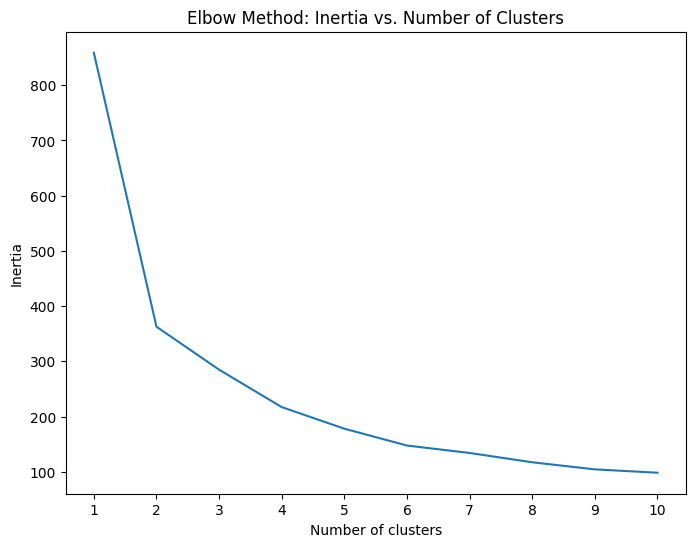

In [5]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=inertia, x='Number of clusters', y='Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xticks(inertia['Number of clusters'])
plt.show()

Оптимальна кількість = 2

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(df[0])

Візуалізація кластеризованих даних

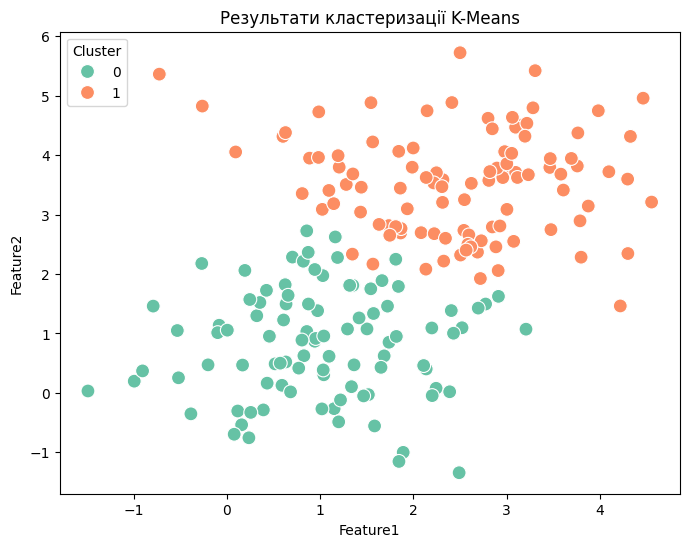

In [7]:
clustered_data1 = pd.DataFrame({'Feature1': df[0].iloc[:, 1], 'Feature2': df[0].iloc[:, 2], 'Cluster': kmeans.labels_})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustered_data1, x='Feature1', y='Feature2', hue='Cluster', palette='Set2', s=100)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Результати кластеризації K-Means')
plt.show()

# Завдання 2

Трансформуємо в двовимірний за допомогою PCA

In [8]:
#2d
pca = PCA(n_components=2).fit_transform(df[1])

Формуємо суму квадратів відстаней між кожною точкою і центроїдом свого кластера з різною кількістю кластерів методом KMeans

In [9]:
inertia_pca = pd.DataFrame()
dfs = []

for k in cluster_numbers_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(pca)
    df_temp = pd.DataFrame({'Inertia': [kmeans.inertia_], 'Number of clusters': [k]})
    dfs.append(df_temp)

inertia_pca = pd.concat(dfs, ignore_index=True)

print(inertia_pca)

        Inertia  Number of clusters
0  2.998303e+08                   1
1  2.058431e+08                   2
2  1.026149e+08                   3
3  7.742409e+07                   4
4  6.802127e+07                   5
5  4.913108e+07                   6
6  4.169524e+07                   7
7  3.789143e+07                   8
8  3.337378e+07                   9
9  3.061736e+07                  10


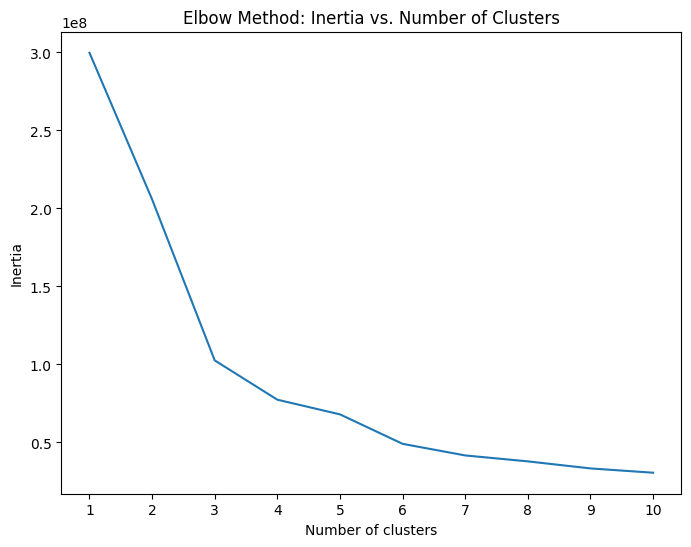

In [10]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=inertia_pca, x='Number of clusters', y='Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xticks(inertia['Number of clusters'])
plt.show()

Приймаємо оптимальне значення = 3

In [11]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(pca)

Візуалізація кластеризованих даних

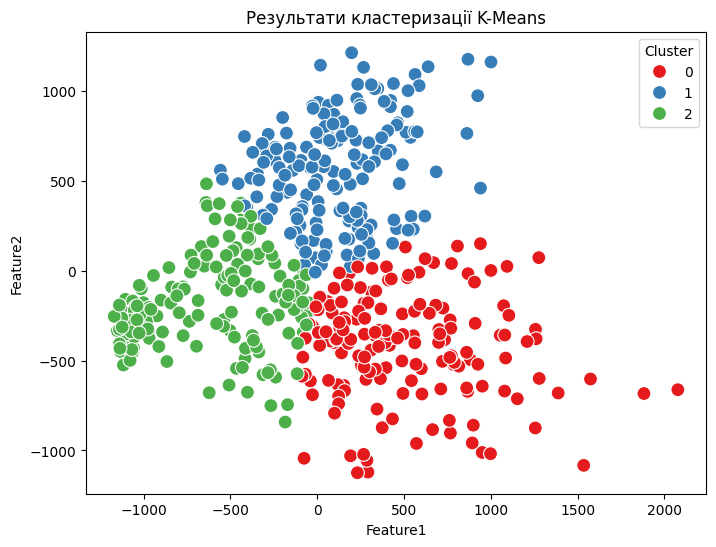

In [12]:
clustered_data2 = pd.DataFrame({'PC1': pca[:, 0], 'PC2': pca[:, 1], 'Cluster': kmeans_pca.labels_})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustered_data2, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Результати кластеризації K-Means')
plt.show()